In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


We begin by importing the data and first checking where we find the NAN values.

In [71]:
fruits = pd.read_csv("fruits.csv")
fruits

,Unnamed: 0,weight,length,width,regularity,cleft
0,0,1.205,4.603915,2.847,5.691634,Small
1,1,1.726,5.978000,3.594,4.539000,Large
2,2,1.126,4.516534,2.710,5.965993,Average
3,3,1.755,5.791000,3.690,5.366000,Large
4,4,1.238,4.666888,2.989,6.153947,Small
...,...,...,...,...,...,...
175,175,1.345,NaN,3.065,3.531000,Very small
176,176,1.237,4.508595,2.960,4.655452,Small
177,177,1.437,5.569000,3.153,1.464000,Average
178,178,1.273,5.412000,2.882,3.533000,Very small


In [72]:
fruits = pd.read_csv("fruits.csv")
fruits.drop("Unnamed: 0", axis=1, inplace=True)
fruits

,weight,length,width,regularity,cleft
0,1.205,4.603915,2.847,5.691634,Small
1,1.726,5.978000,3.594,4.539000,Large
2,1.126,4.516534,2.710,5.965993,Average
3,1.755,5.791000,3.690,5.366000,Large
4,1.238,4.666888,2.989,6.153947,Small
...,...,...,...,...,...
175,1.345,NaN,3.065,3.531000,Very small
176,1.237,4.508595,2.960,4.655452,Small
177,1.437,5.569000,3.153,1.464000,Average
178,1.273,5.412000,2.882,3.533000,Very small


In [73]:
not_nan = fruits.count()
columns = fruits.columns

for i in range(5):
    print("Number of NAN in", columns[i], ":", 180 - not_nan[i])


Number of NAN in weight : 12
Number of NAN in length : 24
Number of NAN in width : 17
Number of NAN in regularity : 10
Number of NAN in cleft : 0


We see that there are NAN values in all columns except for the "cleft" column, so we will need to come up with a way to handle these missing values.

Now, we will examine the numerical data to identify any outliers.

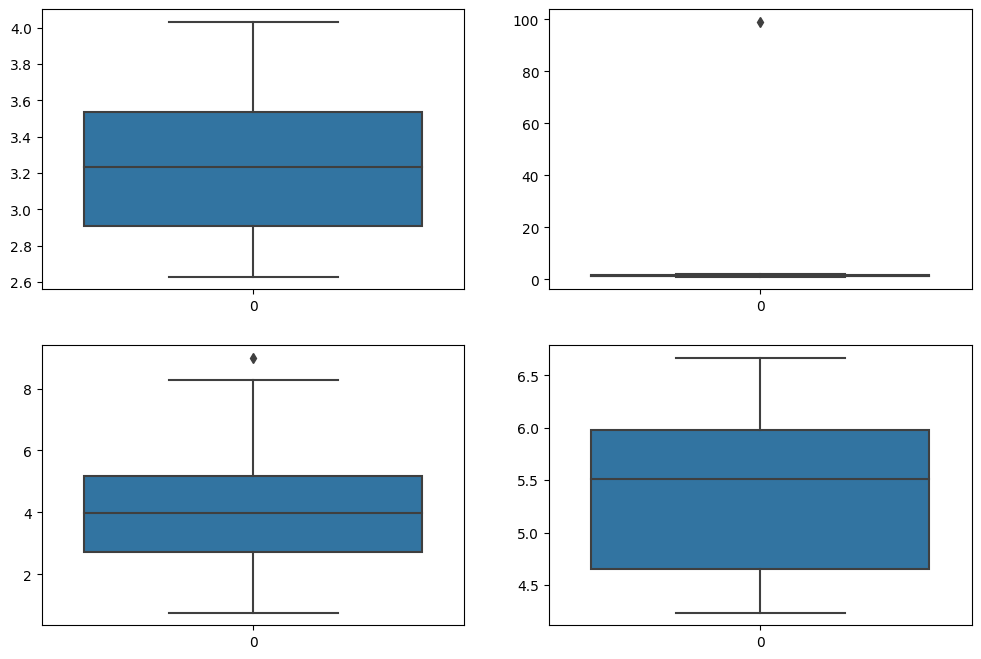

In [74]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(fruits["width"])

plt.subplot(2, 2, 2)
sns.boxplot(fruits["weight"])

plt.subplot(2, 2, 3)
sns.boxplot(fruits["regularity"])

plt.subplot(2, 2, 4)
sns.boxplot(fruits["length"])

plt.show()


We can clearly see that there are outliers in the weight and regularity columns, with one outlier in each column. The weight outlier is clearly an anomaly, most likely due to a measurement error or some other issue, as its occurrence seems implausible. However, the outlier in regularity does not seem as unusual, since although it is quite far from the mean, it is more plausible that it represents an element that was simply atypical, but still needs to be considered for our project.

Once this analysis is completed, we now know that we need to impute both the NAN values and the outlier in the Weight variable. The next step is to discuss how we will impute these missing and anomalous values. Based on the characteristics of the data, we believe that the best approach for imputing them is through the K-Nearest Neighbors method, using the numerical variables in our dataset.

In [75]:
#Ubicamos el dato atípico que queremos eliminar y lo pasamos a NAN
print(fruits[fruits["weight"] >= 10])

fruits["weight"][61] = np.nan

print(fruits[fruits["weight"] >= 10])


    weight  length  width  regularity       cleft
61    99.0   6.173  3.651       2.443  Very large
Empty DataFrame
Columns: [weight, length, width, regularity, cleft]
Index: []


<ipython-input-75-3662671eae58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruits["weight"][61] = np.nan


In [76]:
fruits

,weight,length,width,regularity,cleft
0,1.205,4.603915,2.847,5.691634,Small
1,1.726,5.978000,3.594,4.539000,Large
2,1.126,4.516534,2.710,5.965993,Average
3,1.755,5.791000,3.690,5.366000,Large
4,1.238,4.666888,2.989,6.153947,Small
...,...,...,...,...,...
175,1.345,NaN,3.065,3.531000,Very small
176,1.237,4.508595,2.960,4.655452,Small
177,1.437,5.569000,3.153,1.464000,Average
178,1.273,5.412000,2.882,3.533000,Very small


In [77]:
from sklearn.impute import SimpleImputer

simpleImp = SimpleImputer(missing_values=np.nan, strategy="mean")
simpleImp.fit(fruits[["weight","length","width", "regularity"]])
fruits_impute_simple = simpleImp.transform(fruits[["weight","length","width", "regularity"]])
print("Simple Imputer: ", fruits_impute_simple[175][1])

Simple Imputer:  5.3824124004494776


In [78]:
from sklearn.impute import KNNImputer

neighbours = [3, 5, 7, 9, 11, 13, 15]

for neighbour in neighbours:

    imputer = KNNImputer(n_neighbors=neighbour, weights="uniform")
    imputer.fit(fruits[["weight","length","width", "regularity"]])

    fruits_impute_k=imputer.transform(fruits[["weight", "length", "width", "regularity"]])
    print("KNN Imputer with K = ",neighbour, ": ",fruits_impute_k[175][1])

KNN Imputer with K =  3 :  5.315678295661525
KNN Imputer with K =  5 :  5.372606977396915
KNN Imputer with K =  7 :  5.385147840997796
KNN Imputer with K =  9 :  5.207621692075332
KNN Imputer with K =  11 :  5.181689660442592
KNN Imputer with K =  13 :  5.259352789605269
KNN Imputer with K =  15 :  5.216447020866943


Comparing the two imputers we have used, both the Simple Imputer and the KNN Imputer, and observing how they affect the imputed values, we have decided to choose the KNN Imputer with K = 5. The reason for choosing the KNN Imputer over the Simple Imputer is that the former allows us to predict the missing data more accurately by leveraging the values from other variables, whereas the Simple Imputer only considers one variable. 

The reason we selected K = 5 is mainly related to avoiding very high values of K, as this would lead to a more generalized result. It is also to prevent choosing too low values of K, as this could make our value approximation more sensitive to extreme values.

In [79]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(fruits[["weight","length","width", "regularity"]])

fruits_impute=imputer.transform(fruits[["weight", "length", "width", "regularity"]])

We can see that by imputing the missing values, we have successfully eliminated the NANs from our data. Now, we will create a new dataframe with our updated data.Vemos que gracias a haber imputado hemos conseguido eliminar los NAN de nuestros datos. Ahora crearemos un nuevo dataframe con nuestros nuevos datos.

In [80]:
new_fruits=pd.DataFrame(fruits_impute_k, columns=fruits.columns.drop("cleft"))
new_not_nan = new_fruits.count()

for i in range(4):
    print("Number of NAN in", columns[i], ":", 180 - new_not_nan[i])

Number of NAN in weight : 0
Number of NAN in length : 0
Number of NAN in width : 0
Number of NAN in regularity : 0


<Axes: xlabel='cleft', ylabel='count'>

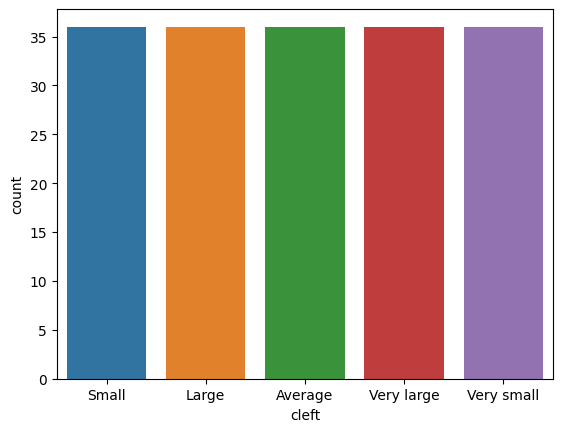

In [81]:
sns.countplot(data=fruits, x="cleft")

From this, we can appreciate that there are 36 instances, each taking one of the following 5 possible values: Small, Large, Average cleft, Very large, and Very small. There are several reasons to apply an Ordinal Encoder to this variable rather than a One Hot Encoder. One reason is that the values that the "cleft" variable can take do have an order that we can define, such as from smallest to largest. Therefore, ordinal encoding makes more sense. Another reason for choosing the Ordinal Encoder over the OneHotEncoder is that with 5 possible values, the OneHotEncoder would generate 4 or 5 additional binary columns. For these and other reasons, we have decided to use an Ordinal Encoder.

In [82]:
from sklearn.preprocessing import OrdinalEncoder

categories=["Very small","Small","Average","Large","Very large"]
encoder = OrdinalEncoder(categories=[categories])

encoder.fit(fruits[["cleft"]])
cleft_encoder=encoder.transform(fruits[["cleft"]])

cleft_encoder=pd.DataFrame(cleft_encoder, columns=["cleft"])
cleft_encoder

,cleft
0,1.0
1,3.0
2,2.0
3,3.0
4,1.0
...,...
175,0.0
176,1.0
177,2.0
178,0.0


Looking at the result, we can determine that we have successfully encoded the "cleft" column into a numerical variable. Now, we will add it to our dataset to proceed with scaling.

In [83]:
new_fruits["cleft"]=cleft_encoder

Next, we will proceed to visualize the data we have, to examine its density and the range of values it contains.

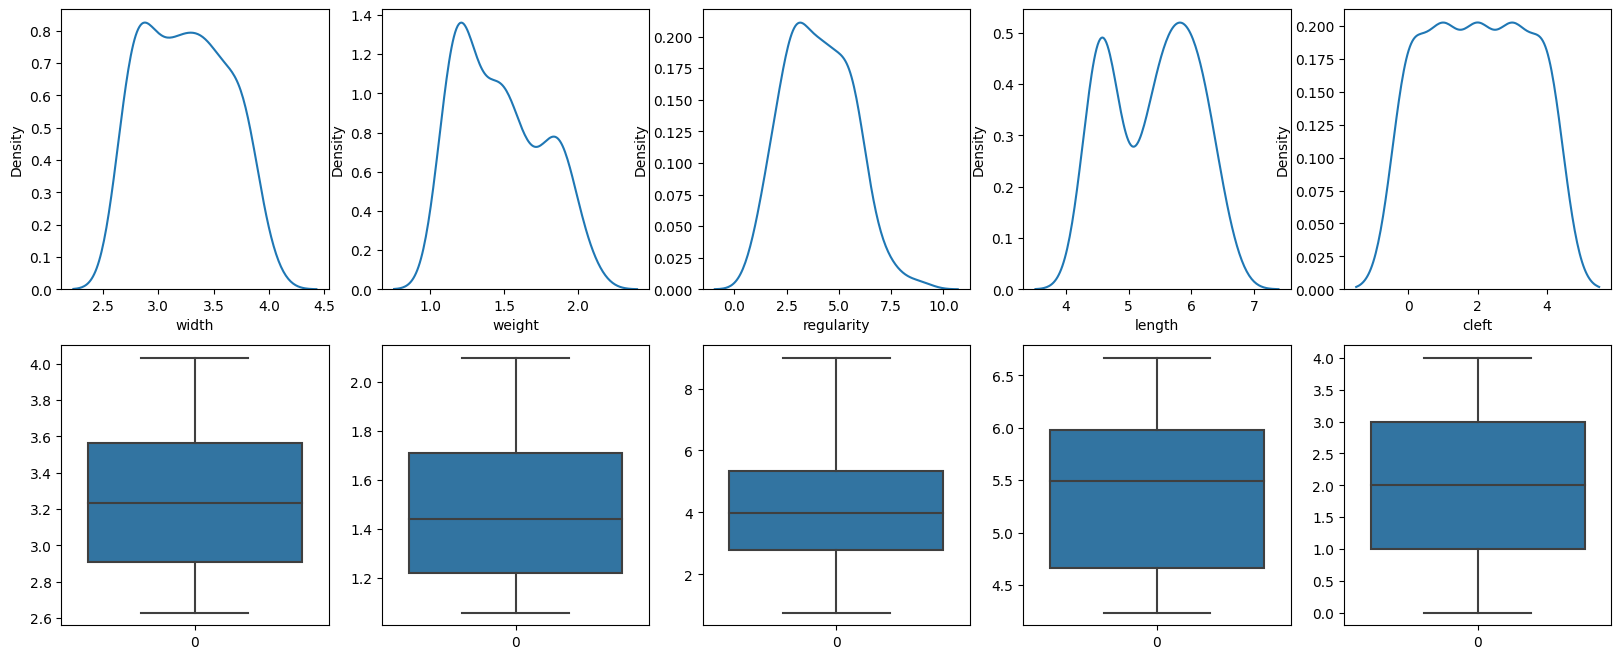

In [84]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 5, 1)
sns.kdeplot(new_fruits["width"])

plt.subplot(2, 5, 2)
sns.kdeplot(new_fruits["weight"])

plt.subplot(2, 5, 3)
sns.kdeplot(new_fruits["regularity"])

plt.subplot(2, 5, 4)
sns.kdeplot(new_fruits["length"])

plt.subplot(2, 5, 5)
sns.kdeplot(new_fruits["cleft"])

plt.subplot(2, 5, 6)
sns.boxplot(new_fruits["width"])

plt.subplot(2, 5, 7)
sns.boxplot(new_fruits["weight"])

plt.subplot(2, 5, 8)
sns.boxplot(new_fruits["regularity"])

plt.subplot(2, 5, 9)
sns.boxplot(new_fruits["length"])

plt.subplot(2, 5, 10)
sns.boxplot(new_fruits["cleft"])

plt.show()

Now we can see that it was a good decision not to remove the outlier from the regularity variable, because with the imputation of the missing data, this outlier is no longer considered anomalous. In these graphs, we can approximately observe both the distribution of the variables and their mean, as well as the range of values they fall within.

To conclude the preprocessing, we first need to consider whether scaling is necessary. By looking at the aforementioned graphs, we can roughly see the ranges, but we want to examine them more precisely.

In [85]:

rangos= dict(keys=columns)
for column in columns:
    max=float(new_fruits[column].max())
    min=float(new_fruits[column].min())
    dif=max-min
    rangos[column]=(min, max, dif)
rangos

{'keys': Index(['weight', 'length', 'width', 'regularity', 'cleft'], dtype='object'),
 'weight': (1.059, 2.097, 1.038),
 'length': (4.236811412670006, 6.666, 2.4291885873299943),
 'width': (2.63, 4.032, 1.4020000000000001),
 'regularity': (0.7651, 8.986146203041347, 8.221046203041347),
 'cleft': (0.0, 4.0, 4.0)}

We can see that the ranges we have are not very similar, so we decided to apply different types of scaling. We must keep in mind that these scaling methods should not disrupt the structure of the data. For example, the variable "cleft" should still only have 5 distinct values after scaling.

We will try different types of scaling, such as StandardScaler, MinMaxScaler, and RobustScaler, to see what kind of results they produce.

In [86]:
def scatterplot_df_fruits(df):

    plt.figure(figsize=(20, 16))

    plt.subplot(5, 4, 1)
    sns.scatterplot(x=df["width"], y=df["weight"])
    plt.subplot(5, 4, 2)
    sns.scatterplot(x=df["width"], y=df["regularity"])
    plt.subplot(5, 4, 3)
    sns.scatterplot(x=df["width"], y=df["length"])
    plt.subplot(5, 4, 4)
    sns.scatterplot(x=df["width"], y=df["cleft"])

    plt.subplot(5, 4, 5)
    sns.scatterplot(x=df["weight"], y=df["width"])
    plt.subplot(5, 4, 6)
    sns.scatterplot(x=df["weight"], y=df["regularity"])
    plt.subplot(5, 4, 7)
    sns.scatterplot(x=df["weight"], y=df["length"])
    plt.subplot(5, 4, 8)
    sns.scatterplot(x=df["weight"], y=df["cleft"])

    plt.subplot(5, 4, 9)
    sns.scatterplot(x=df["regularity"], y=df["weight"])
    plt.subplot(5, 4, 10)
    sns.scatterplot(x=df["regularity"], y=df["width"])
    plt.subplot(5, 4, 11)
    sns.scatterplot(x=df["regularity"], y=df["length"])
    plt.subplot(5, 4, 12)
    sns.scatterplot(x=df["regularity"], y=df["cleft"])

    plt.subplot(5, 4, 13)
    sns.scatterplot(x=df["length"], y=df["weight"])
    plt.subplot(5, 4, 14)
    sns.scatterplot(x=df["length"], y=df["width"])
    plt.subplot(5, 4, 15)
    sns.scatterplot(x=df["length"], y=df["regularity"])
    plt.subplot(5, 4, 16)
    sns.scatterplot(x=df["length"], y=df["cleft"])

    plt.subplot(5, 4, 17)
    sns.scatterplot(x=df["cleft"], y=df["weight"])
    plt.subplot(5, 4, 18)
    sns.scatterplot(x=df["cleft"], y=df["width"])
    plt.subplot(5, 4, 19)
    sns.scatterplot(x=df["cleft"], y=df["regularity"])
    plt.subplot(5, 4, 20)
    sns.scatterplot(x=df["cleft"], y=df["length"])

    plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


standar_scalar_fruits = new_fruits[["weight","length","width", "regularity", "cleft"]]
scaler1 = StandardScaler()
scaler1.fit(standar_scalar_fruits)
standar_scalar_fruits=scaler1.transform(standar_scalar_fruits)
standar_scalar_fruits=pd.DataFrame(standar_scalar_fruits, columns=columns)

minmax_scalar_fruits = new_fruits[["weight","length","width", "regularity", "cleft"]]
scaler2 = MinMaxScaler()
scaler2.fit(minmax_scalar_fruits)
minmax_scalar_fruits=scaler2.transform(minmax_scalar_fruits)
minmax_scalar_fruits=pd.DataFrame(minmax_scalar_fruits, columns=columns)

robust_scalar_fruits = new_fruits[["weight","length","width", "regularity", "cleft"]]
scaler3 = RobustScaler()
scaler3.fit(robust_scalar_fruits)
robust_scalar_fruits=scaler3.transform(robust_scalar_fruits)
robust_scalar_fruits=pd.DataFrame(robust_scalar_fruits, columns=columns)




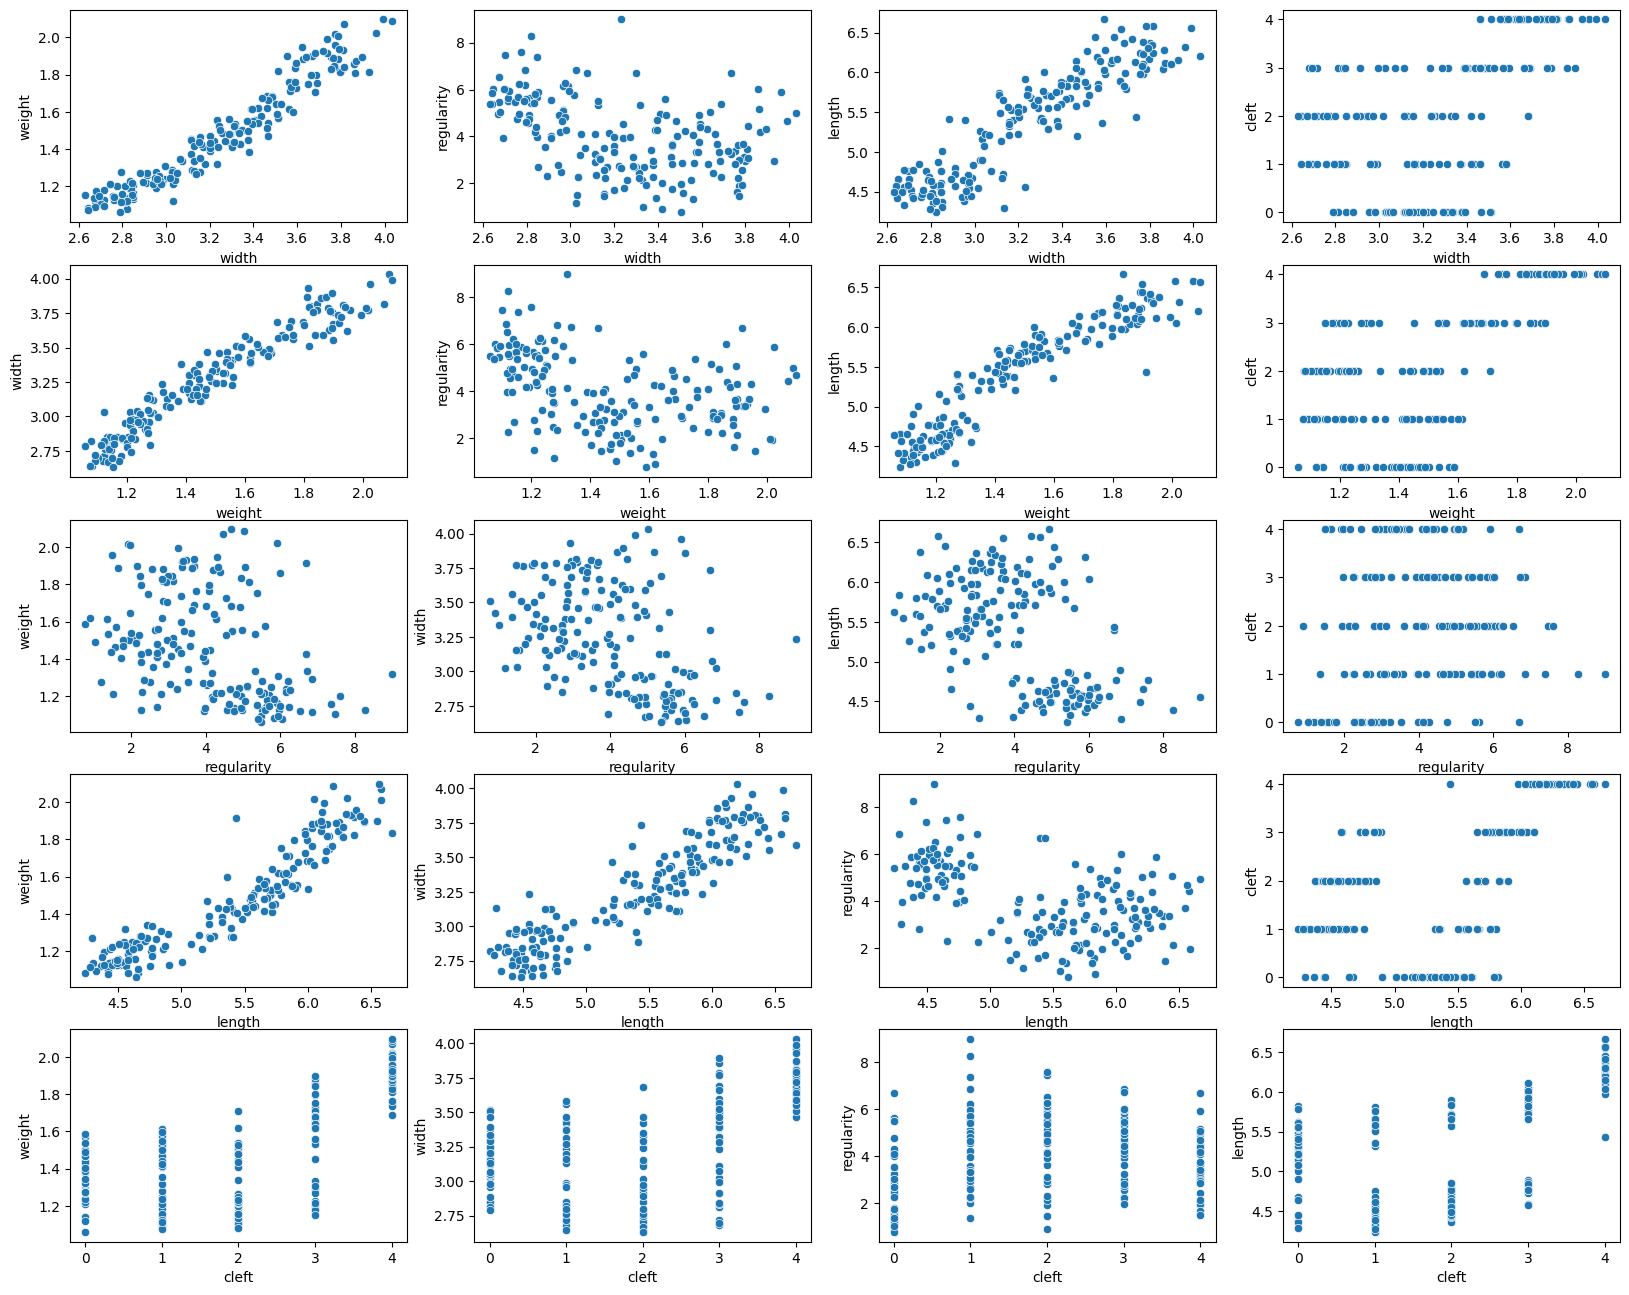

In [88]:
scatterplot_df_fruits(new_fruits)

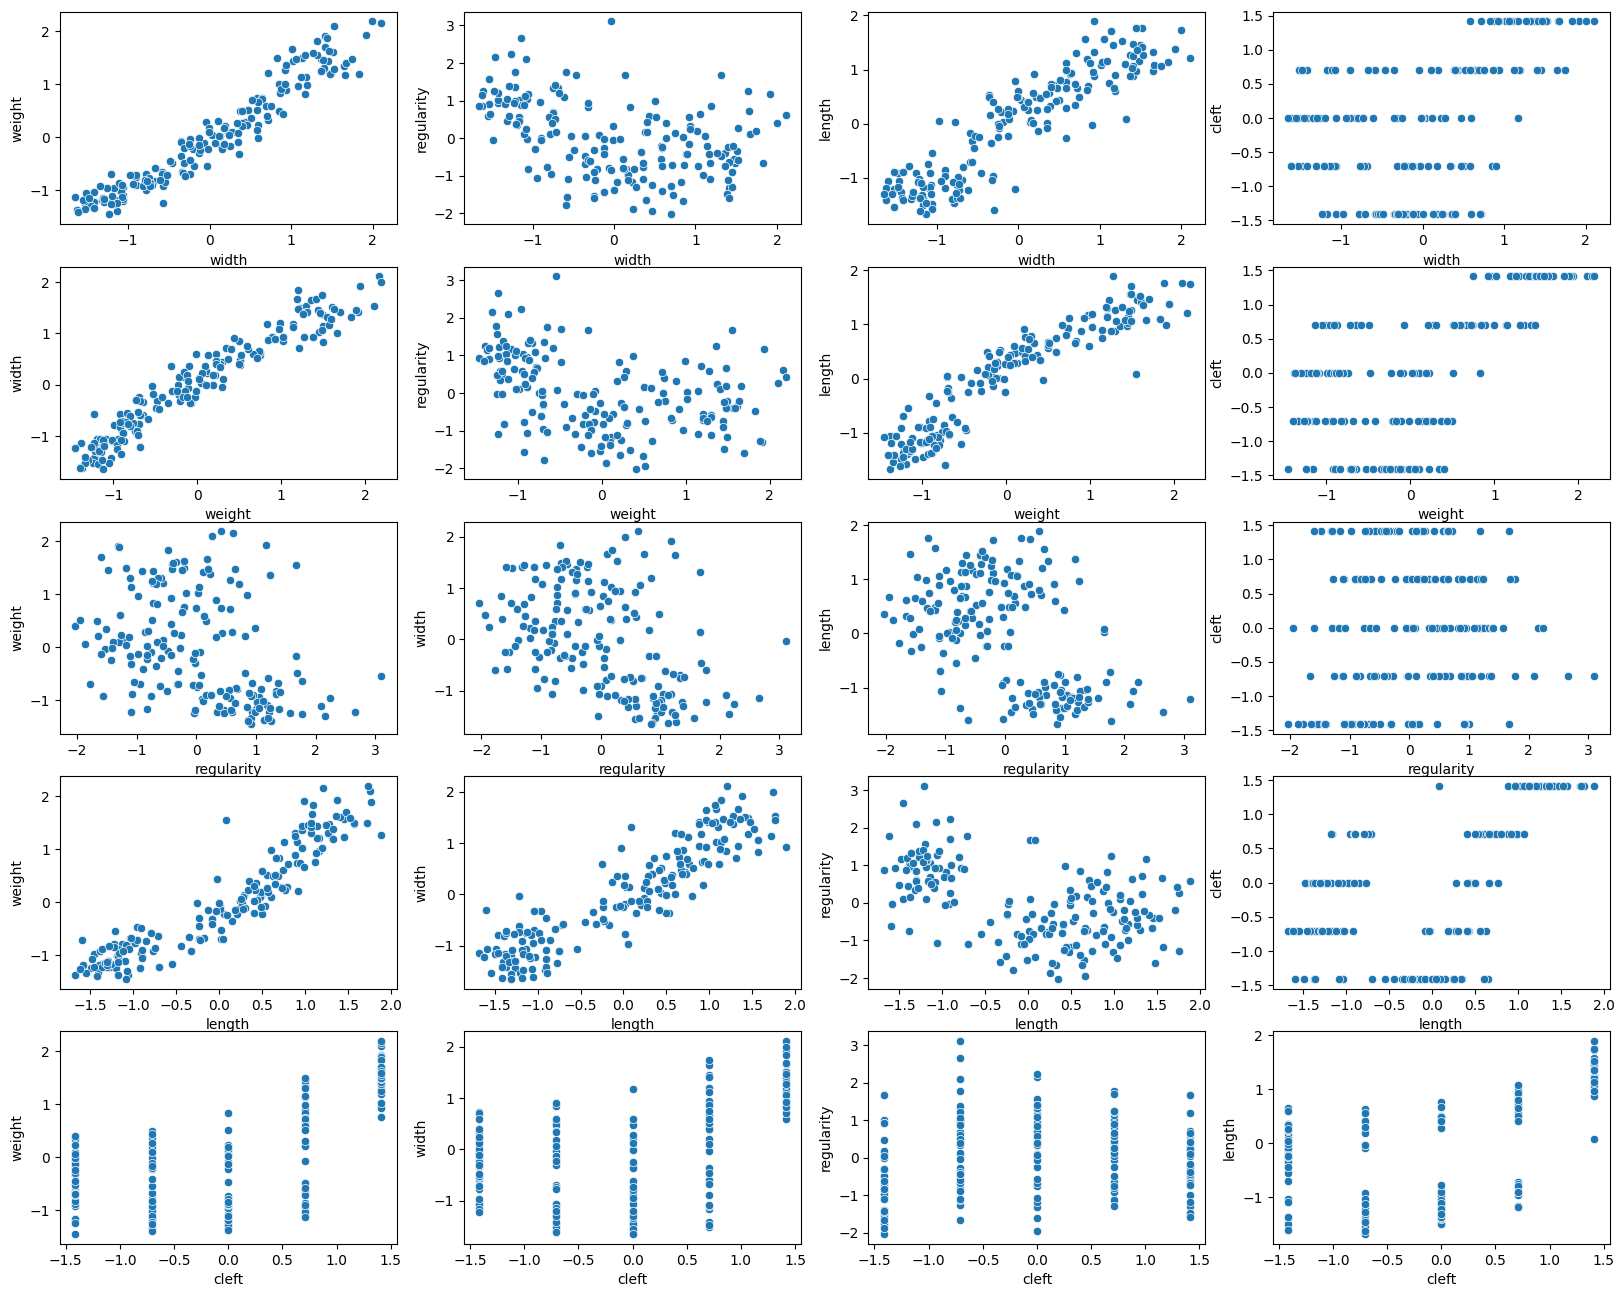

In [89]:
scatterplot_df_fruits(standar_scalar_fruits)

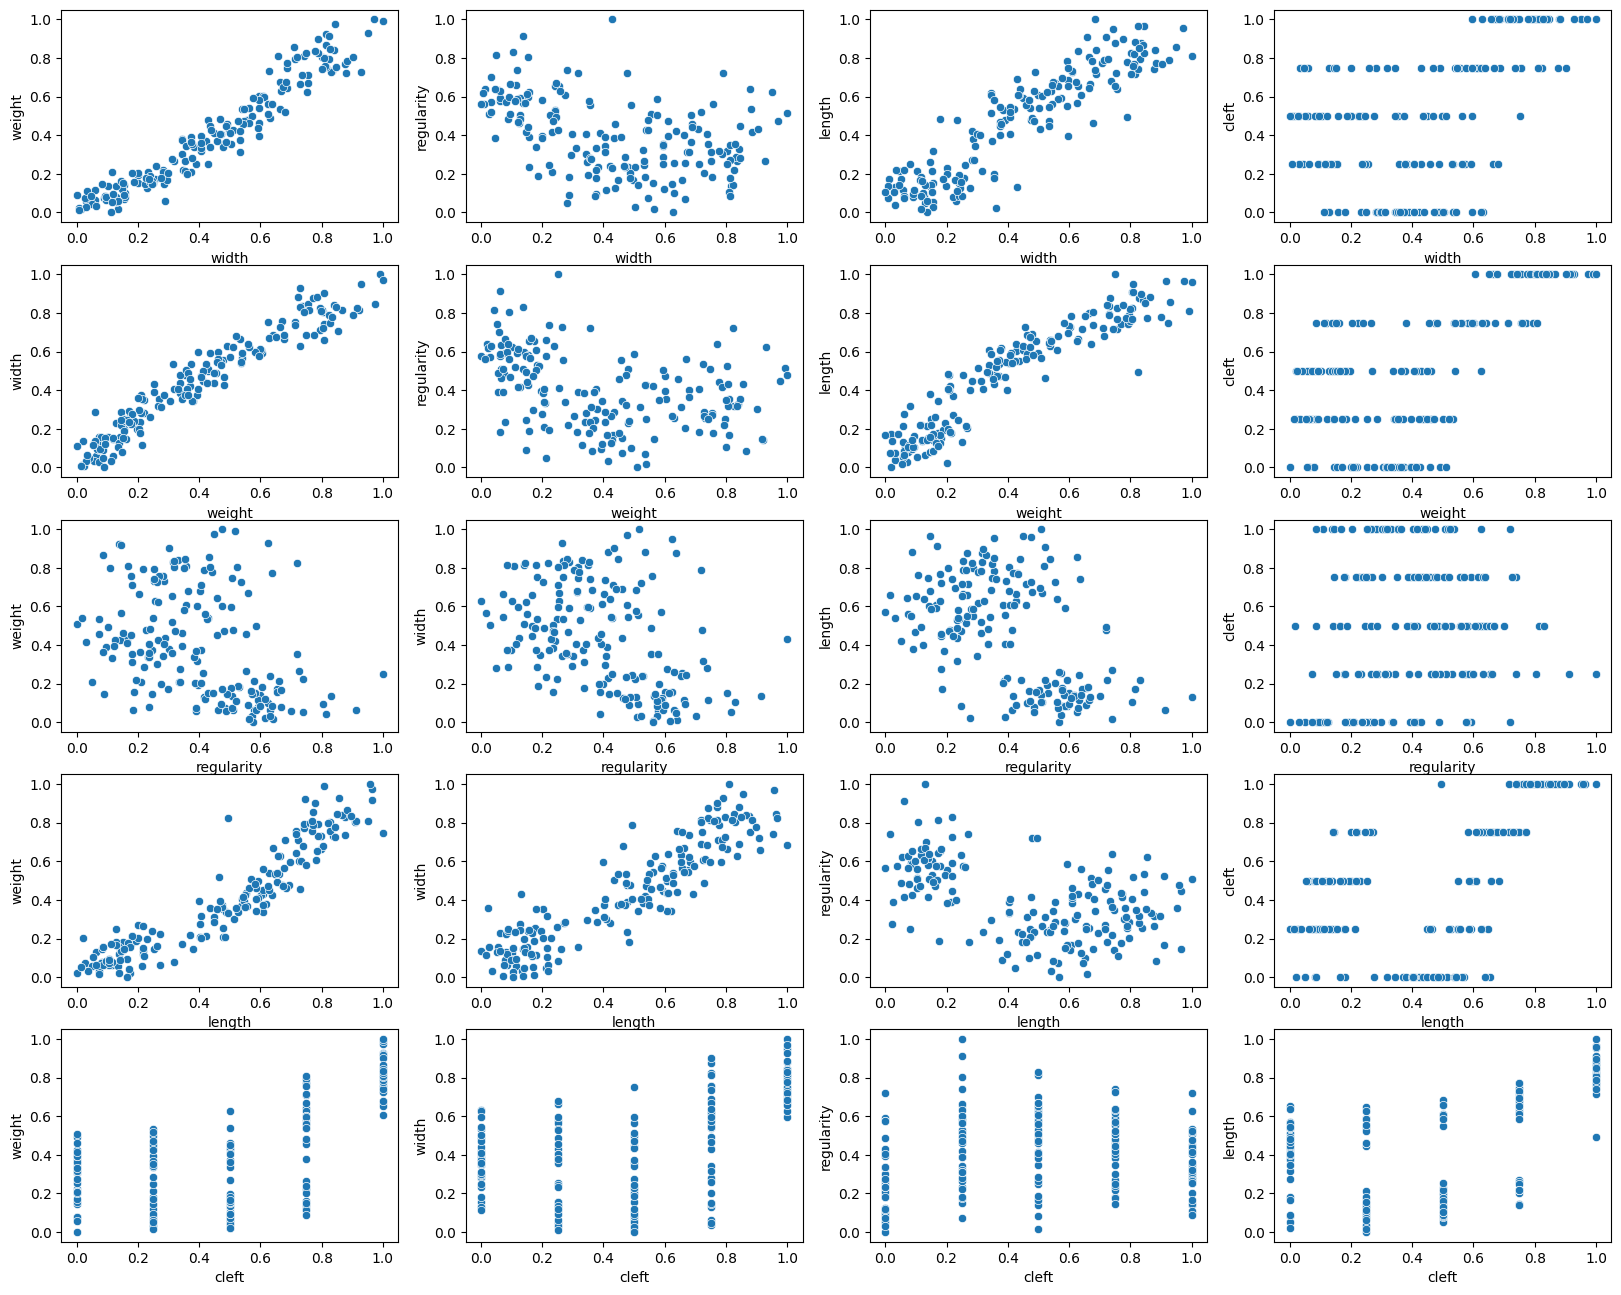

In [90]:
scatterplot_df_fruits(minmax_scalar_fruits)

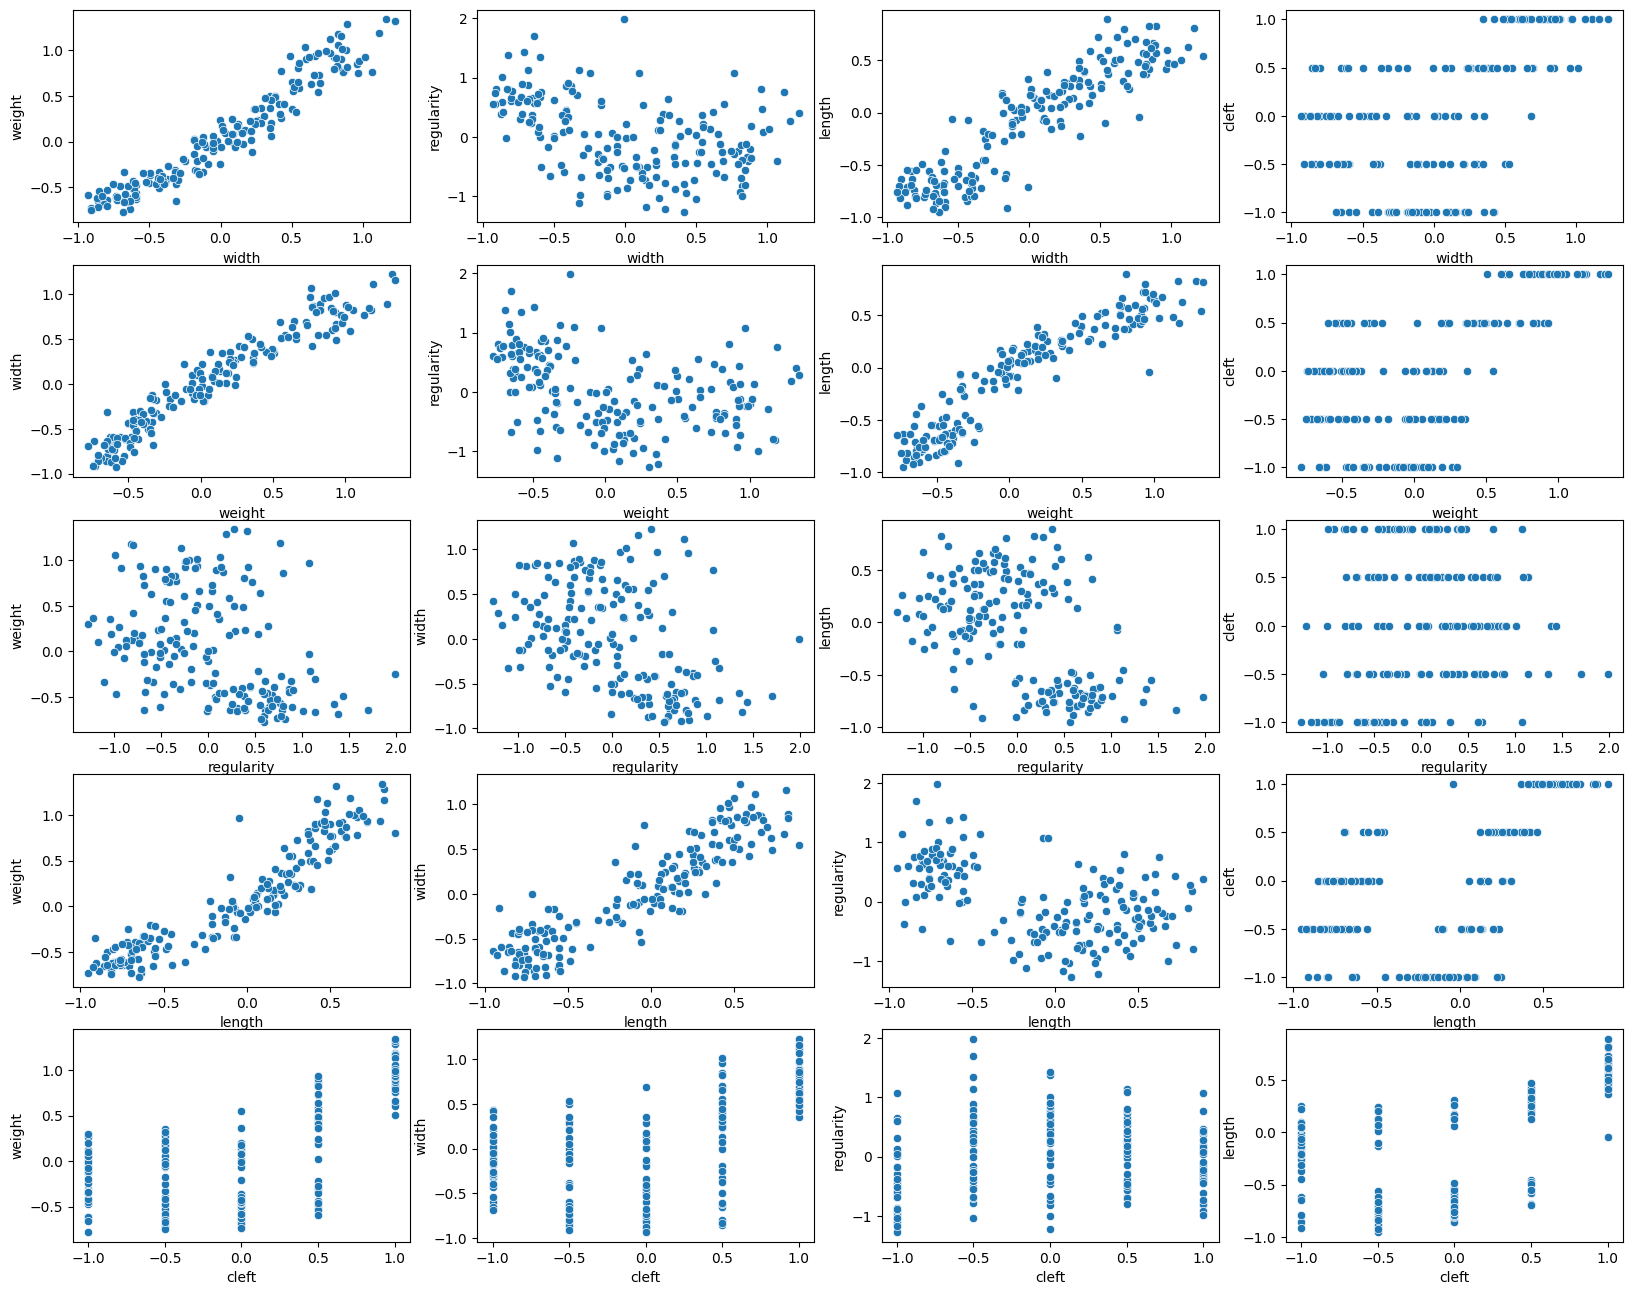

In [91]:
scatterplot_df_fruits(robust_scalar_fruits)

We save the models in a dictionary.

In [92]:
scalar_models={"No": new_fruits, "Standar": standar_scalar_fruits, "MinMax": minmax_scalar_fruits, "Robust": robust_scalar_fruits}

As we can see in the scatterplots, there doesn't seem to be any change in the structure of the data, but we can clearly observe changes in the scale we were working with. At first glance, we cannot determine which of these datasets will yield the best results, so we will test different methods on them to determine which one is optimal.

Once the preprocessing is completed, we will apply the various clustering techniques we know to see which ones yield the best results. We will begin by applying hierarchical clustering.

When applying a hierarchical clustering method such as agglomerative clustering, the main question that arises is which type of linkage to use. These types can be: Ward, Complete, Average, or Single. We also need to consider the number of clusters we want or the dissimilarity measure we wish to use. By default, we will use Euclidean distance, but we will also test other measures such as Manhattan distance.Cuando se aplica un método de clustering jerárquico como el clustering aglomerativo, la principal duda que nos surge es que tipo de linkage utilizamos. Estos tipos pueden ser: Ward, Complete, Average, Simple. También debemos tener en cuenta el número de clusters que queremos o la medida de disimilaridad que queremos utilizar. Nosotros por defecto usaremos la distancia euclídea, pero también probaremos algunas otras como la distancia Manhathan.

Next, we will define some functions that might be useful later on to visualize the potential clusters we have.A continuación, vamos a definir algunas funciones que nos pueden venir bien más adelante para mostrar los posibles clusters que tenemos.

In [93]:
from sklearn.cluster import AgglomerativeClustering

#El objetivo de esta función es probar distintos números de clusters
def aglomerative_clustering_n(data, linkage, n_range, distance):
    dict_cluster={}
    for n in n_range:
        cluster=AgglomerativeClustering(n_clusters=n, linkage=linkage, metric=distance).fit_predict(data)
        dict_cluster[n]=cluster
    return dict_cluster


#El objetivo de esta función es mostrar dado un dataframe, la distribución de los valores que toman los distintos clusters

def mostrar_clusters(df: pd.DataFrame, n_paleta):

    paleta = sns.color_palette("Set1", n_colors=n_paleta)

    plt.figure(figsize=(20, 16))

    plt.subplot(5, 4, 1)
    sns.scatterplot(x=df["width"], y=df["weight"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 2)
    sns.scatterplot(x=df["width"], y=df["regularity"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 3)
    sns.scatterplot(x=df["width"], y=df["length"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 4)
    sns.scatterplot(x=df["width"], y=df["cleft"], hue=df["cluster"], palette=paleta, legend=False)

    plt.subplot(5, 4, 5)
    sns.scatterplot(x=df["weight"], y=df["width"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 6)
    sns.scatterplot(x=df["weight"], y=df["regularity"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 7)
    sns.scatterplot(x=df["weight"], y=df["length"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 8)
    sns.scatterplot(x=df["weight"], y=df["cleft"], hue=df["cluster"], palette=paleta, legend=False)

    plt.subplot(5, 4, 9)
    sns.scatterplot(x=df["regularity"], y=df["weight"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 10)
    sns.scatterplot(x=df["regularity"], y=df["width"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 11)
    sns.scatterplot(x=df["regularity"], y=df["length"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 12)
    sns.scatterplot(x=df["regularity"], y=df["cleft"], hue=df["cluster"], palette=paleta, legend=False)

    plt.subplot(5, 4, 13)
    sns.scatterplot(x=df["length"], y=df["weight"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 14)
    sns.scatterplot(x=df["length"], y=df["width"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 15)
    sns.scatterplot(x=df["length"], y=df["regularity"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 16)
    sns.scatterplot(x=df["length"], y=df["cleft"], hue=df["cluster"], palette=paleta, legend=False)

    plt.subplot(5, 4, 17)
    sns.scatterplot(x=df["cleft"], y=df["weight"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 18)
    sns.scatterplot(x=df["cleft"], y=df["width"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 19)
    sns.scatterplot(x=df["cleft"], y=df["regularity"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 20)
    sns.scatterplot(x=df["cleft"], y=df["length"], hue=df["cluster"], palette=paleta, legend=False)

    plt.show()

To draw better conclusions and get closer to the solution, we will first start with an analysis of the dendrograms we generate. These dendrograms will be characterized by the type of linkage, the data scaling, and the distance metric used.

Here, we have generated several dendrograms from which we will try to draw conclusions. First, we want to determine the typical number of clusters we obtain, despite changes in the data, distances, and linkages.

In most of the dendrograms, we see that we generate 3 clusters. Other values for the number of clusters that appear frequently are 2 and 4. Therefore, we can assume that the number of clusters will be around these values.

Another conclusion that can be drawn from the dendrograms is that the single linkage type is most likely to result in extreme values. In most of the dendrograms generated using this linkage, we observe either a single cluster, two clusters with one of them heavily unbalanced, or a large number of clusters generated. This makes sense based on what we have studied, as we saw that single linkage tends to be very extreme when balancing clusters. In the case of the average linkage, we know that it is sensitive to the scales. This can be verified by the graphs, as when we perform clustering with the unscaled data using this linkage and Euclidean distance, we notice that it generates very different results compared to when we use the same configuration but with scaled data.

The complete and Ward linkages seem to be the most reliable for our case, although we have the disadvantage that Ward can only be used with the Euclidean distance metric.

As for the metrics, it seems that when we use correlation or Chebyshev distance, we obtain less reliable results, as they are highly varied and do not allow us to draw strong conclusions. On the other hand, when we use Euclidean or Manhattan distances, we typically get more consistent and comparable results.

In summary, we have decided not to use either the single or average linkage, as Ward and complete linkage provide better results. Lastly, we will use Euclidean and Manhattan distances, and discard Chebyshev distance and correlation as metrics.

Having discussed this, it's time to decide which data scaling to use. We have already seen that unscaled data does not work well, so it is the first to be discarded. If we look at the dendrograms plotted using the metrics and linkages we have settled on, we can see that those with standardized data show the most similarity, and therefore have the highest likelihood of leading us to a correct solution. Consequently, standardized data will form our dataset from now on.

We can conclude by stating that the criterion we followed for discarding possible combinations of scaling, metrics, and linkage is that we retained those combinations whose dendrograms had the most common characteristics with the others.

With these diagrams, we still cannot decide how many clusters we should use, so we will now employ the silhouette coefficient to determine the optimal number of clusters, as well as which metric and linkage yield the best results for that number of clusters.

In [95]:
from sklearn.metrics import silhouette_score

def silhouette(data, dict_cluster, metric):

    silhouette=[]
    n_range = range(2,8)

    for n in n_range:

        silhouette.append(silhouette_score(data, labels=dict_cluster[n], metric=metric))

    plt.plot(n_range, silhouette, marker = "o", linestyle="-")

In [96]:
final_fruits_dict = {"Standar Scaler":standar_scalar_fruits, "Robust Scaler":robust_scalar_fruits, "MinMax Scaler":minmax_scalar_fruits}
distances = ["euclidean", "cityblock"]
linkages = ["ward", "complete"]
n_range = range(2,8)

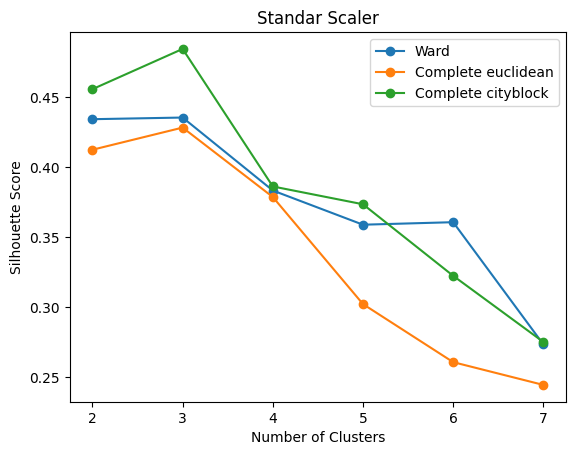

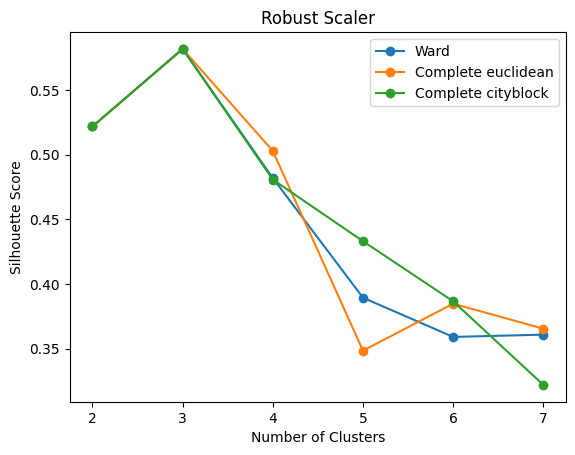

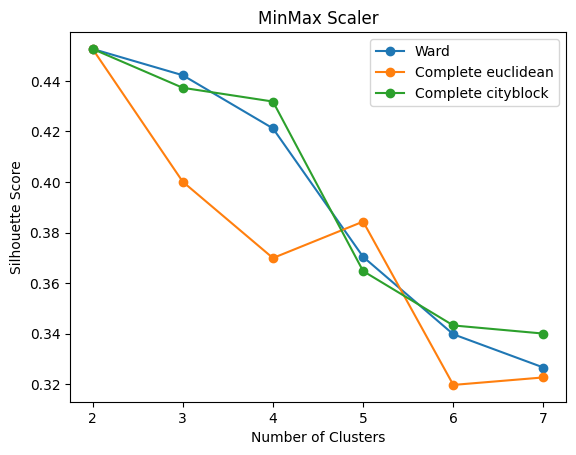

In [102]:
for key in final_fruits_dict.keys():
    dict_ward = aglomerative_clustering_n(final_fruits_dict[key], linkage="ward", distance="euclidean", n_range=n_range)
    dict_complete_euclidean = aglomerative_clustering_n(final_fruits_dict[key], linkage="complete", distance="euclidean", n_range=n_range)
    dict_complete_cityblock = aglomerative_clustering_n(final_fruits_dict[key], linkage="complete", distance="cityblock", n_range=n_range)

    silhouette(final_fruits_dict[key], dict_ward, "euclidean")
    silhouette(final_fruits_dict[key], dict_complete_euclidean, "euclidean")
    silhouette(final_fruits_dict[key], dict_complete_cityblock, "euclidean")

    plt.legend(["Ward", "Complete euclidean", "Complete cityblock"])
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title(str(key))
    plt.show()

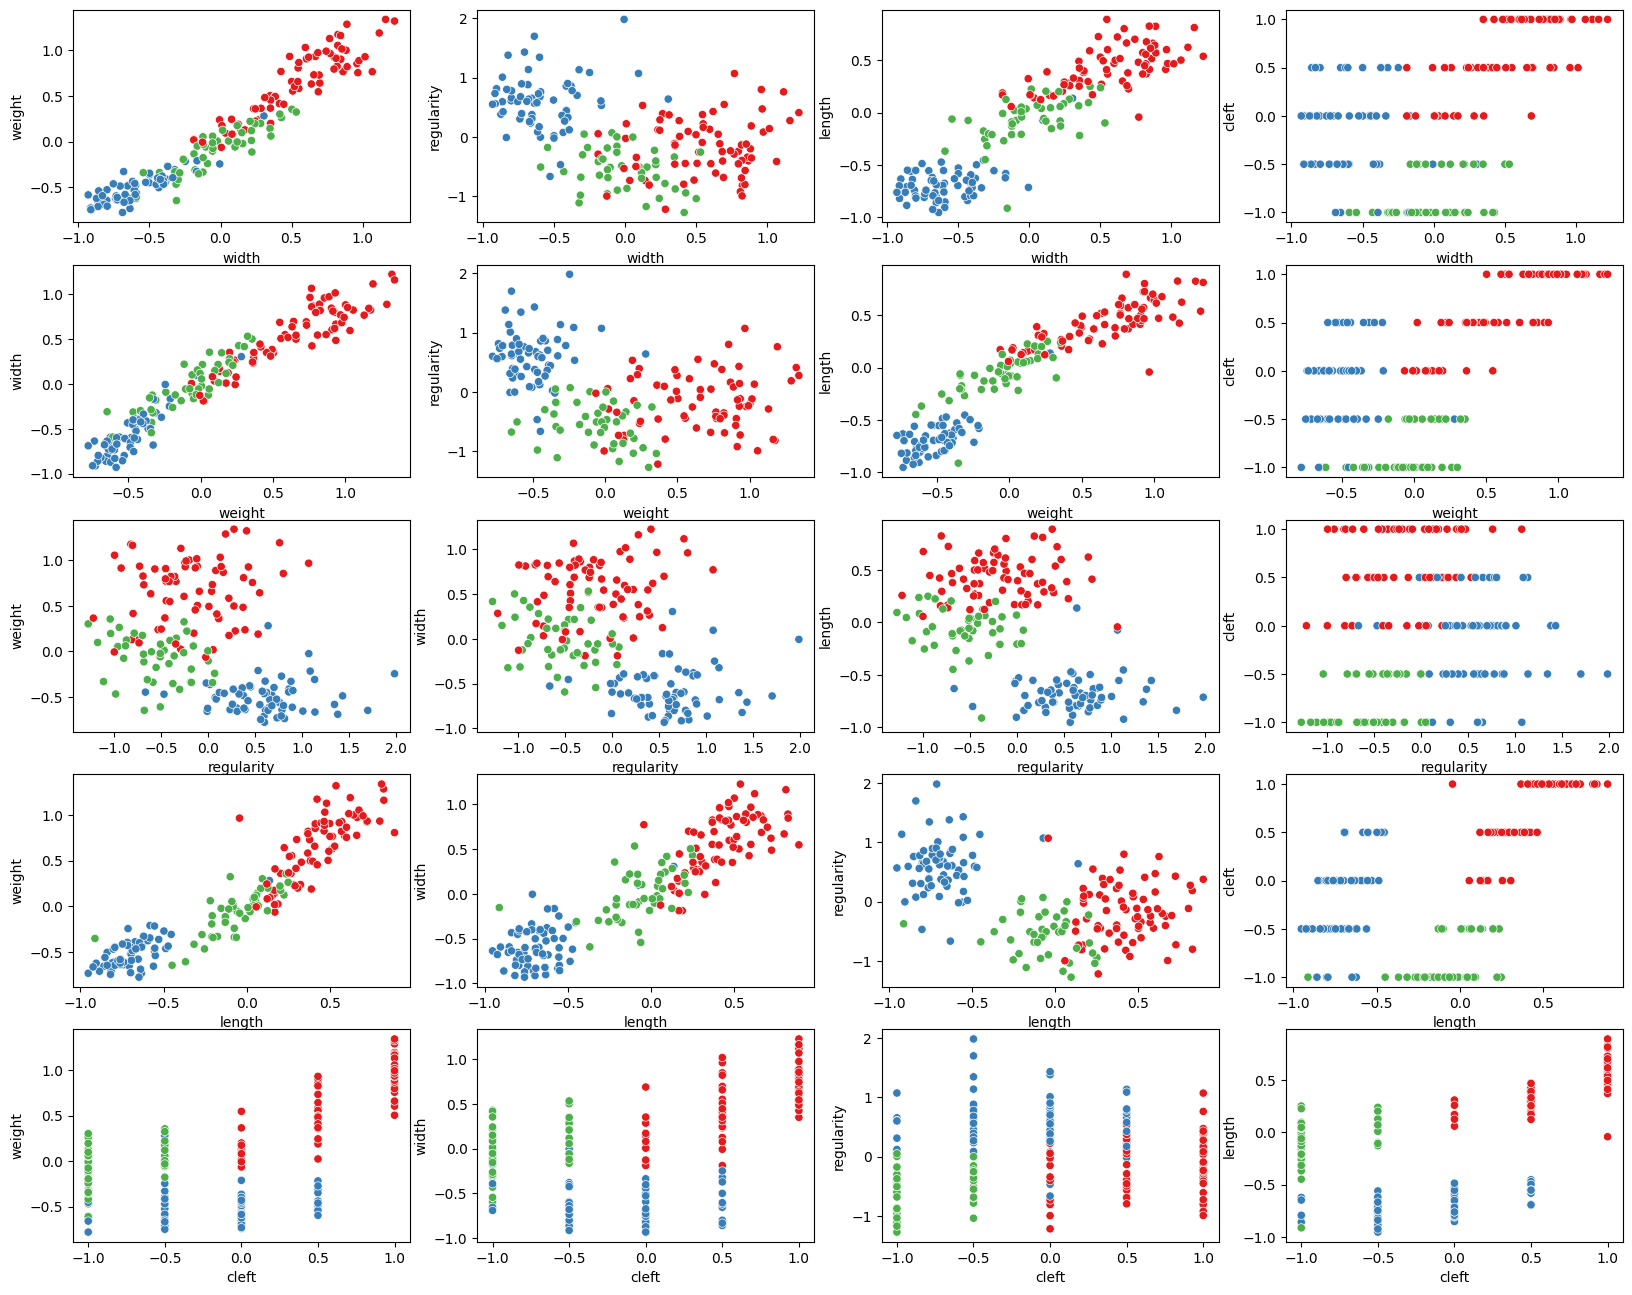

In [98]:
final_fruits = robust_scalar_fruits
n=3
final_cluster=aglomerative_clustering_n(final_fruits, linkage="ward", n_range=[3], distance="euclidean")

final_fruits["cluster"]=final_cluster[3]

mostrar_clusters(final_fruits, n)

In [99]:
from sklearn.cluster import KMeans

def kmeans_for_each_scalar(scalar_models : dict):
    for key in scalar_models.keys():
        Ks = range(1, 8)
        kmeans_per_k = [KMeans(n_clusters=k, random_state=0, n_init=10).fit(scalar_models[key]) for k in Ks]
        silhouette_scores = [silhouette_score(scalar_models[key], model.labels_) for model in kmeans_per_k[1:]]
        inertias = [model.inertia_ for model in kmeans_per_k]

        plt.figure(figsize=(8,4))
        plt.suptitle(str(key), fontsize=25)

        plt.subplot(1, 2, 1)
        plt.plot(Ks[1:], silhouette_scores, "ko-")
        plt.xlabel("$k$", fontsize=14)
        plt.ylabel("Silhouette score", fontsize=14)
        #plt.tight_layout()
        #plt.title(str(key))
        plt.subplot(1, 2, 2)
        plt.plot(Ks, inertias, "bo-")
        plt.xlabel("$k$", fontsize=14)
        plt.ylabel("Inertia", fontsize=14)
        plt.tight_layout()
        plt.show()


Creamos la función “k_means_for_each_scalar” que nos será útil para crear las gráficas del coeficiente de Silhouette y de codo para todos los métodos que hemos hayamos utilizado. A continuación, la pasaremos nuestros datos por esta función.We created the function `k_means_for_each_scalar`, which will be useful for generating the silhouette coefficient and elbow plots for all the methods we have used. We will then pass our data through this function.

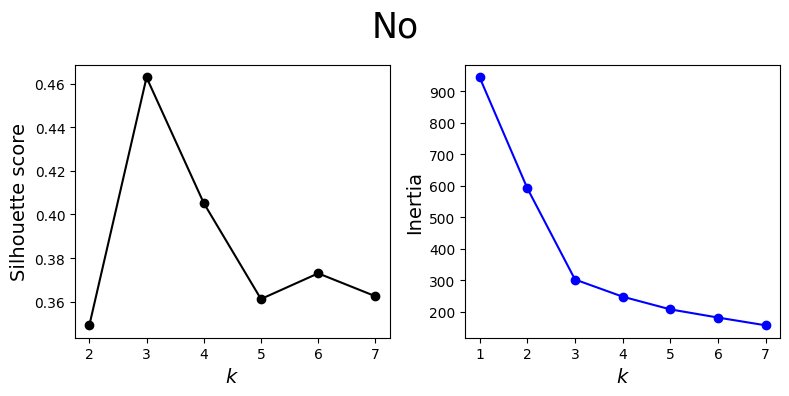

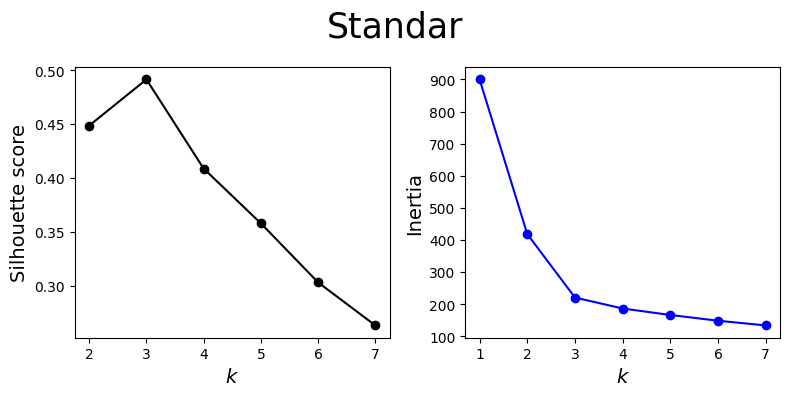

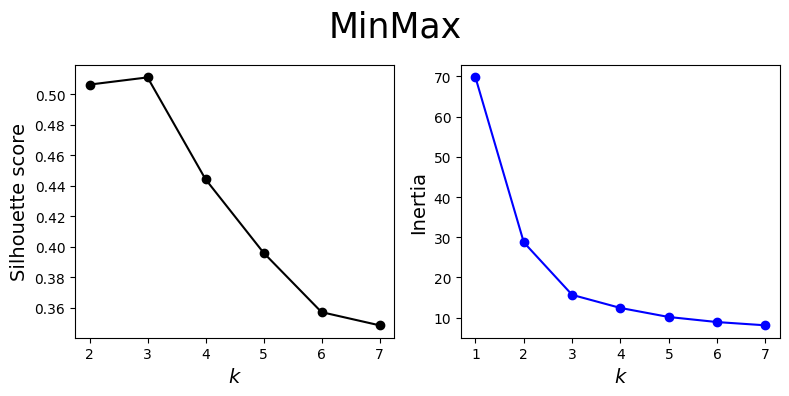

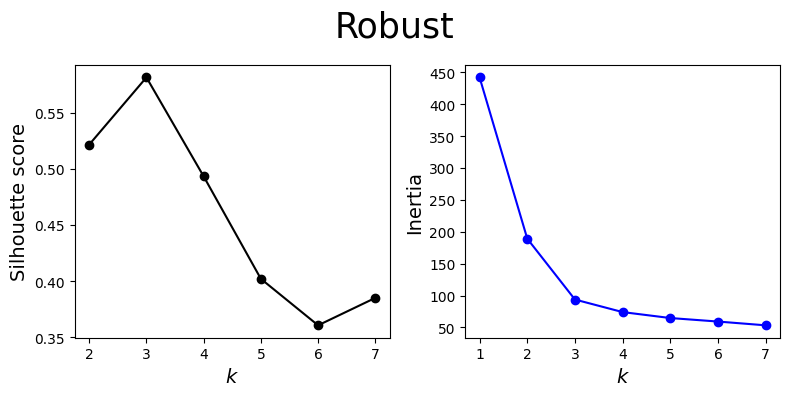

In [100]:
kmeans_for_each_scalar(scalar_models)

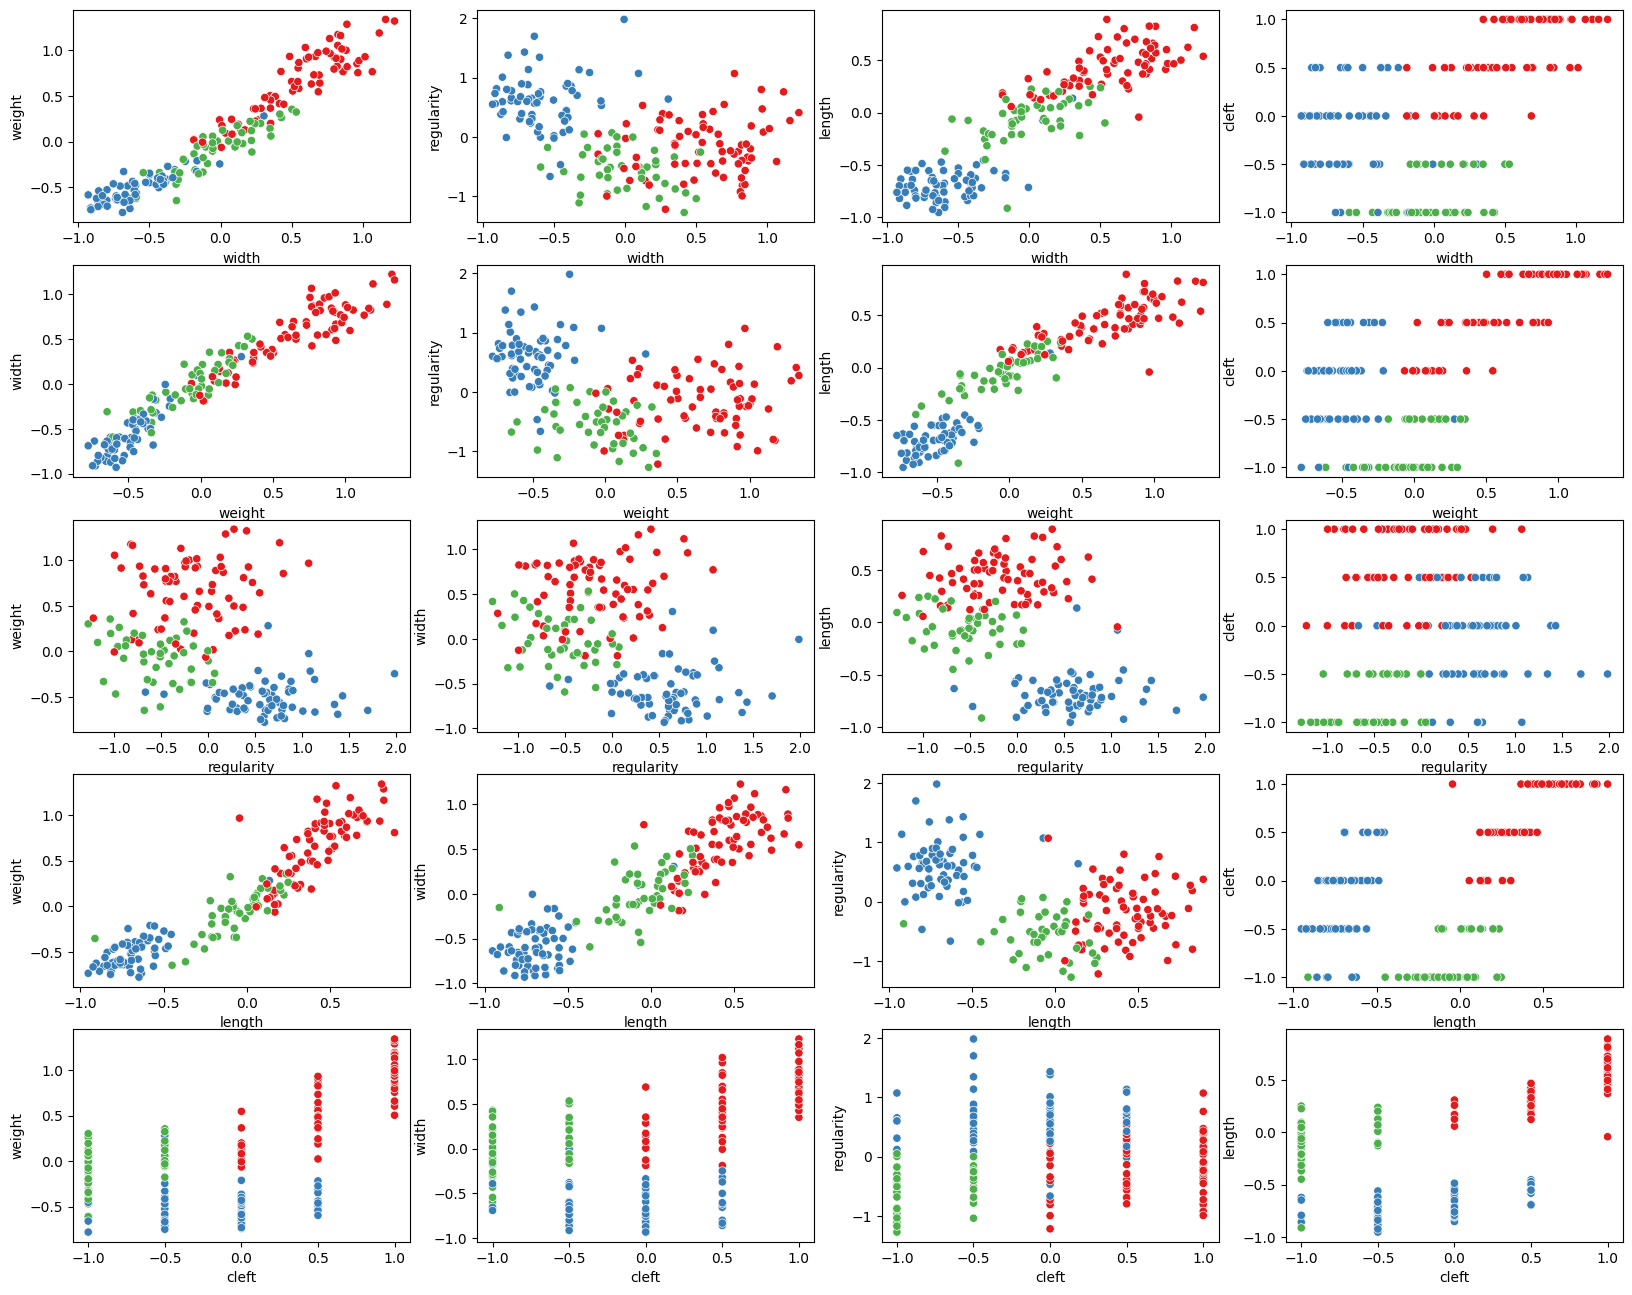

In [101]:
cluster=KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(robust_scalar_fruits)
final_fruits_kmeans=robust_scalar_fruits
final_fruits_kmeans["cluster"]=cluster
mostrar_clusters(df=final_fruits_kmeans, n_paleta=3)
